In [1]:
import pandas as pd 
import numpy as np 


In [2]:
df = pd.read_excel('Telecom Churn Rate Dataset.xlsx')

### Task 1: Exploratory Data Analysis (EDA) and Initial Cleaning

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [5]:
df.shape

(7043, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [8]:
print(df['TotalCharges'].dtype)

object


In [9]:
df['TotalCharges'].unique()

array([29.85, 1889.5, 108.15, ..., 346.45, 306.6, 6844.5], dtype=object)

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
print(df['TotalCharges'].dtype)

float64


In [12]:
missing_data = df.isnull().sum()
print(missing_data)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64


In [13]:
missing_percent =(missing_data / len(df)) * 100
print(missing_percent)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
numAdminTickets     0.000000
numTechTickets      0.000000
Churn               0.000000
dtype: float64


In [14]:
missing_summary = pd.DataFrame({
    "Missing Values": missing_data,
    "Percentage": missing_percent.round(2)
})

In [15]:
print(missing_summary[missing_summary["Missing Values"] > 0])

              Missing Values  Percentage
TotalCharges              11        0.16


In [16]:
df = df.dropna(subset=['TotalCharges'])

In [17]:
missing_data = df.isnull().sum()
missing_summary_after = pd.DataFrame({
    "Missing Values": missing_data,
    "Percentage": (missing_data / len(df)) * 100
})

In [18]:
print(missing_data)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64


#### Data Visualization:

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/wy/pyd6gfbj0rn5k7yr6hcsygdw0000gn/T/ipykernel_2072/2731943729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="Set3")


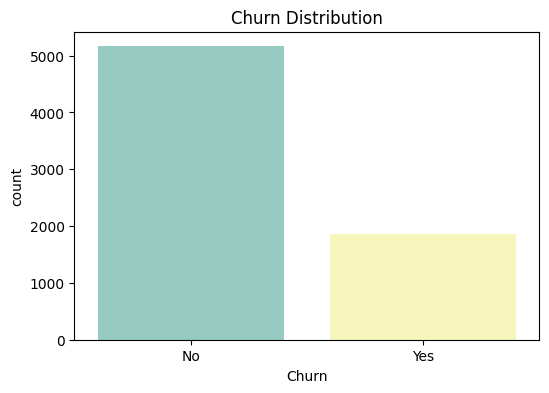

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn", palette="Set3")
plt.title("Churn Distribution")
plt.show()

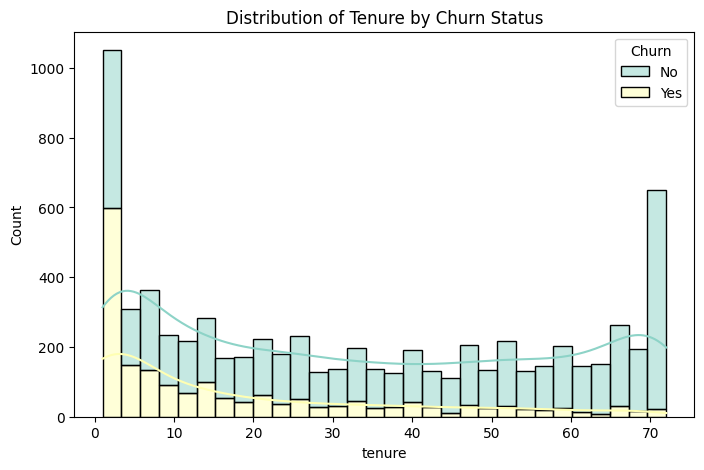

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=True, multiple="stack", palette="Set3")
plt.title("Distribution of Tenure by Churn Status")
plt.show()


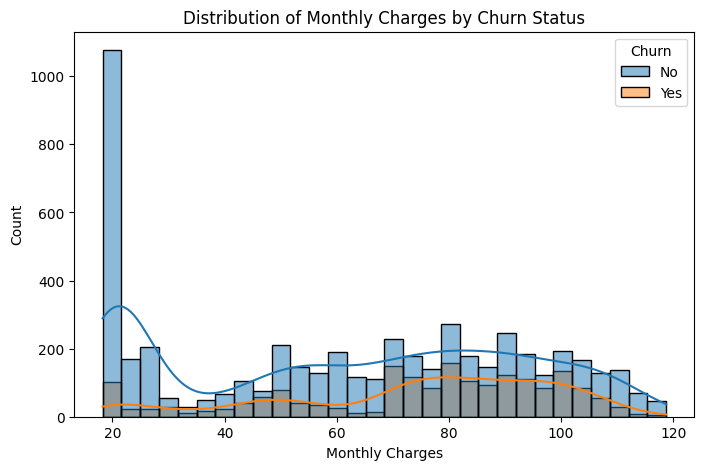

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", kde=True, bins=30)
plt.title("Distribution of Monthly Charges by Churn Status")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

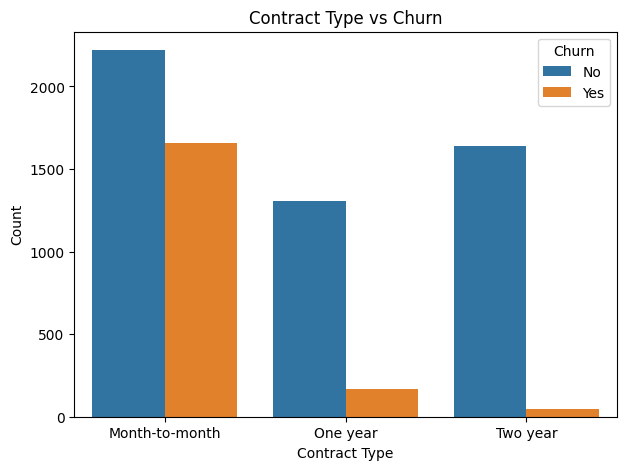

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

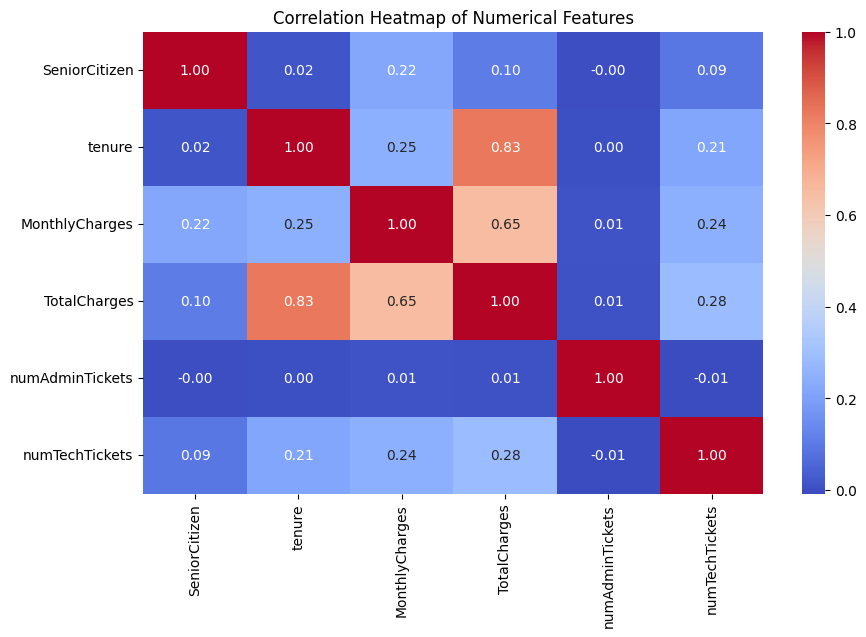

In [24]:
plt.figure(figsize=(10,6))
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

From the above heatmap, TotalCharges - tenure and TotalCharges - MonthlyCharges are having high correlation. TotalCharges - tenure might have multicollinearity as they are highly correlated. 

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df.drop(columns=['Churn'])  
X = X.select_dtypes(include=['float64', 'int64'])  
X_const = add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

           Feature        VIF
0            const  15.192906
1    SeniorCitizen   1.057219
2           tenure   5.851590
3   MonthlyCharges   3.330672
4     TotalCharges   9.569407
5  numAdminTickets   1.000269
6   numTechTickets   1.098891


const is the intercept, so we'll just ignore it. 

TotalCharges have VIF = 9.56 (which is very high, that means it has multicollinearity.)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### Task 2: Feature Engineering

In [27]:
df['TenureGroup'] = pd.cut(df['tenure'],
                           bins=[0, 12, 24, 48, 72],
                           labels=['0-1 yr', '1-2 yrs', '2-4 yrs', '4-6 yrs'])

Helps the model capture nonlinear relationships between loyalty length and churn (e.g., very new customers vs. long-term customers behave differently).

In [28]:
df['AvgMonthlyTickets'] = np.where(df['tenure'] > 0, #condition
                                   (df['numAdminTickets'] + df['numTechTickets']) / df['tenure'], #if true
                                   0) # if false

Measures how often a customer raises support tickets relative to their tenure.

In [29]:
print(df[['tenure', 'TenureGroup', 'AvgMonthlyTickets']].head())

   tenure TenureGroup  AvgMonthlyTickets
0       1      0-1 yr           0.000000
1      34     2-4 yrs           0.000000
2       2      0-1 yr           0.000000
3      45     2-4 yrs           0.066667
4       2      0-1 yr           0.000000


In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,TenureGroup,AvgMonthlyTickets
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No,0-1 yr,0.000000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,0,0,No,2-4 yrs,0.000000
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes,0-1 yr,0.000000
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No,2-4 yrs,0.066667
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes,0-1 yr,0.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customerID         7032 non-null   object  
 1   gender             7032 non-null   object  
 2   SeniorCitizen      7032 non-null   int64   
 3   Partner            7032 non-null   object  
 4   Dependents         7032 non-null   object  
 5   tenure             7032 non-null   int64   
 6   PhoneService       7032 non-null   object  
 7   MultipleLines      7032 non-null   object  
 8   InternetService    7032 non-null   object  
 9   OnlineSecurity     7032 non-null   object  
 10  OnlineBackup       7032 non-null   object  
 11  DeviceProtection   7032 non-null   object  
 12  TechSupport        7032 non-null   object  
 13  StreamingTV        7032 non-null   object  
 14  StreamingMovies    7032 non-null   object  
 15  Contract           7032 non-null   object  
 16  PaperlessBi

### Task 3: Building the End-to-End Pipeline

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [33]:
X = df.drop(columns=['Churn', 'customerID', 'TotalCharges'])
y = df['Churn'].map({'Yes': 1, 'No': 0}) 

In [34]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

Numeric: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'numAdminTickets', 'numTechTickets', 'AvgMonthlyTickets']
Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TenureGroup']


In [35]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [36]:
y_pred = pipeline.predict(X_test)

print("Pipeline ready! Shape of predictions:", y_pred.shape)

Pipeline ready! Shape of predictions: (1407,)


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [38]:
y_pred = pipeline.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Logistic Regression Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

Logistic Regression Performance:
Accuracy : 0.8500
Precision: 0.7376
Recall   : 0.6765

Detailed Classification Report:
              precision    recall  f1-score   support

    No Churn       0.89      0.91      0.90      1033
       Churn       0.74      0.68      0.71       374

    accuracy                           0.85      1407
   macro avg       0.81      0.79      0.80      1407
weighted avg       0.85      0.85      0.85      1407



### Task 4: Model Selection and Hyperparameter Tuning

In [40]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [41]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In this task, I chose Logistic regression as it is the basic model for classification. 

Another model I chose was the Random forest, as it is an ensembling learning model, it generally gives better accuracy than the logistic regression or other linear models. As it captures non-linear relationship, while reducing overfitting through ensembling. 

Third model I chose was Gradient boosting, as it is more advanced ensembling technique, that sequentially improve model's performance and also gets higher predictive accuracy.

In [42]:
from sklearn.metrics import f1_score

for name, clf in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"{name}: F1-weighted = {f1:.4f}")

Logistic Regression: F1-weighted = 0.8479
Random Forest: F1-weighted = 0.8373
Gradient Boosting: F1-weighted = 0.8498


#### Hyperparameter Tuning

In [43]:
param_grid_gb = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__max_depth": [3, 5, 7]
}

gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

grid_search_gb = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=param_grid_gb,
    scoring="f1_weighted",
    cv=5,
    n_jobs=-1
)

grid_search_gb.fit(X_train, y_train)

print("✅ Best Hyperparameters for Gradient Boosting:", grid_search_gb.best_params_)
print("✅ Best Cross-Validation F1-weighted:", grid_search_gb.best_score_)

y_pred_gb = grid_search_gb.predict(X_test)
from sklearn.metrics import f1_score
print("Test F1-weighted:", f1_score(y_test, y_pred_gb, average="weighted"))

from sklearn.metrics import classification_report
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred_gb, target_names=["No Churn", "Churn"]))


✅ Best Hyperparameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
✅ Best Cross-Validation F1-weighted: 0.8620101283581029
Test F1-weighted: 0.8497768200988054

Classification Report on Test Data:
              precision    recall  f1-score   support

    No Churn       0.89      0.91      0.90      1033
       Churn       0.74      0.69      0.71       374

    accuracy                           0.85      1407
   macro avg       0.81      0.80      0.81      1407
weighted avg       0.85      0.85      0.85      1407



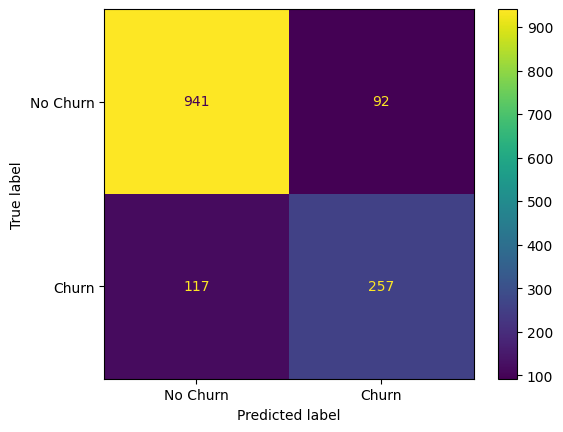

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(grid_search_gb, X_test, y_test, display_labels=["No Churn", "Churn"])
plt.show()


### Task 5: Handling Class Imbalance

In [45]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

smote_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

smote_pipeline.fit(X_train, y_train)

#Check the rows added by SMOTE (For oversampling)
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_res, y_res = smote_pipeline.named_steps["smote"].fit_resample(X_train_preprocessed, y_train)
print("\n Rows added by SMOTE (for oversampling)")
print("Before SMOTE:", X_train.shape[0], "rows")
print("After SMOTE:", X_res.shape[0], "rows")
print("Rows added:", X_res.shape[0] - X_train.shape[0])

print("\n === Without SMOTE ===")
print(classification_report(y_test, y_pred_gb, target_names=["No Churn", "Churn"]))
print("Test F1-weighted:", f1_score(y_test, y_pred_gb, average="weighted"))

y_pred_smote = smote_pipeline.predict(X_test)

print("\n=== With SMOTE ===")
print(classification_report(y_test, y_pred_smote, target_names=["No Churn", "Churn"]))

print("F1-weighted with SMOTE:",
      f1_score(y_test, y_pred_smote, average="weighted"))



 Rows added by SMOTE (for oversampling)
Before SMOTE: 5625 rows
After SMOTE: 8260 rows
Rows added: 2635

 === Without SMOTE ===
              precision    recall  f1-score   support

    No Churn       0.89      0.91      0.90      1033
       Churn       0.74      0.69      0.71       374

    accuracy                           0.85      1407
   macro avg       0.81      0.80      0.81      1407
weighted avg       0.85      0.85      0.85      1407

Test F1-weighted: 0.8497768200988054

=== With SMOTE ===
              precision    recall  f1-score   support

    No Churn       0.92      0.85      0.88      1033
       Churn       0.66      0.79      0.72       374

    accuracy                           0.84      1407
   macro avg       0.79      0.82      0.80      1407
weighted avg       0.85      0.84      0.84      1407

F1-weighted with SMOTE: 0.8408533828714387


From the above classification report, we can say that by using SMOTE, the overall F1-weighted is not much improved, but it made the model more fair and balanced by improving the minority class’s recall. In churn prediciton system, catching more churn cases (even if it is a false alarm) can be more valuable because missing churn can be more costlier than wrongly catching the non-churn ones. 

### Task 6: Final Evaluation and Interpretation

In [46]:
from sklearn.metrics import roc_auc_score, confusion_matrix

In [47]:
y_pred_final = smote_pipeline.predict(X_test) 
y_proba_final = smote_pipeline.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_proba_final)

print("Final Model Performance on Test Set:")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")
print(f"ROC AUC   : {roc_auc:.4f}")

Final Model Performance on Test Set:
Precision : 0.6607
Recall    : 0.7914
F1-Score  : 0.7202
ROC AUC   : 0.9150



Classification Report:
              precision    recall  f1-score   support

    No Churn       0.92      0.85      0.88      1033
       Churn       0.66      0.79      0.72       374

    accuracy                           0.84      1407
   macro avg       0.79      0.82      0.80      1407
weighted avg       0.85      0.84      0.84      1407

F1 weighted:  0.8408533828714387


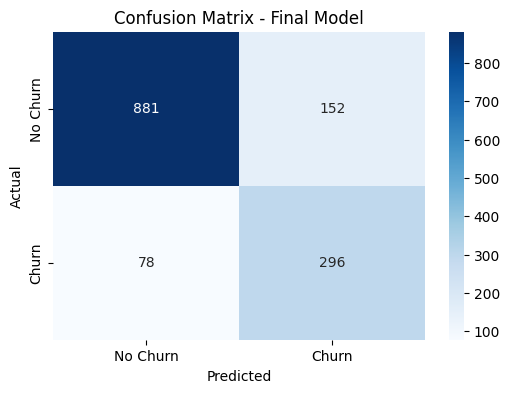

In [48]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=["No Churn", "Churn"]))
print("F1 weighted: ", f1_score(y_test, y_pred_smote, average="weighted"))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Final Model")
plt.show()

### Analyze the confusion matrix. In the context of customer churn, what is the business cost of a False Positive versus a False Negative? Which one is worse?

From the above confusion matrix, True Negative = 881, False Positive = 152, False Negative = 78, True Positive = 296. 

So according to business cost, False positive (152) means the model predicted that the customer will churn, but actually he didn't. So you might offer some discounts or offers to the loyal customers that might cost you money, but the customer was not going to churn anyway. 

On the other hand, False Negative (78) means that model predicted that the customer will not churn but he actually churned. You might miss the change to retain a leaving customer. Losing a customer can be more expensive than offering small offers or discounts to the loyal customers. 

### If your final model was a tree-based ensemble (like Random Forest or Gradient Boosting), extract and visualize the top 10 most important features. Discuss what these features tell you about the main drivers of customer churn.

/var/folders/wy/pyd6gfbj0rn5k7yr6hcsygdw0000gn/T/ipykernel_2072/3667667604.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')


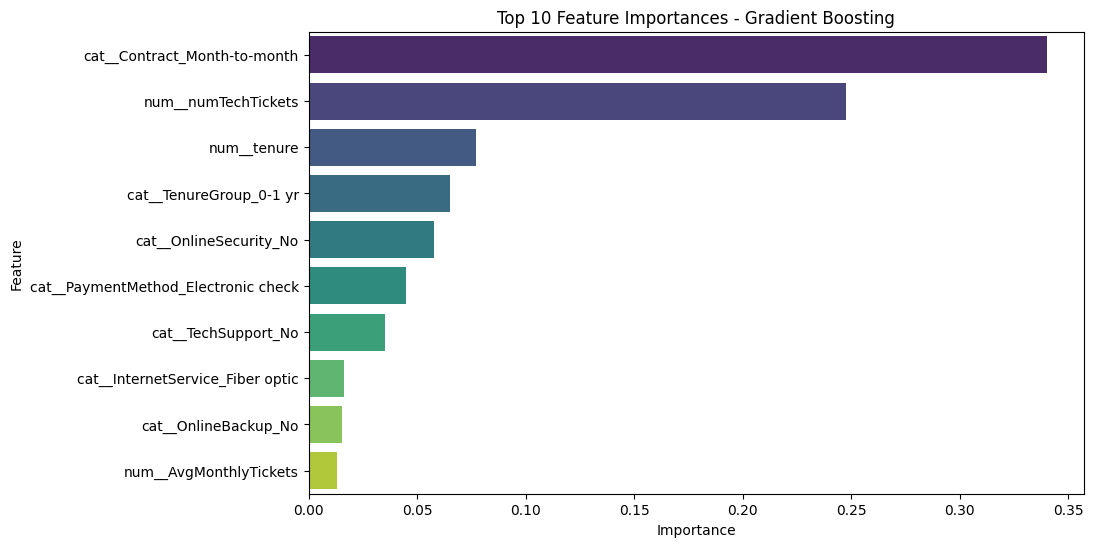

In [49]:
preprocessor = smote_pipeline.named_steps['preprocessor']
gb_model = smote_pipeline.named_steps['classifier']
feature_names = preprocessor.get_feature_names_out()

feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': gb_model.feature_importances_
})

top_features = feature_importances.sort_values(by='importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')
plt.title('Top 10 Feature Importances - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [50]:
print("Top 10 features driving churn:")
for i, feature in enumerate(top_features['feature'], 1):
    print(f"{i}. {feature}")

Top 10 features driving churn:
1. cat__Contract_Month-to-month
2. num__numTechTickets
3. num__tenure
4. cat__TenureGroup_0-1 yr
5. cat__OnlineSecurity_No
6. cat__PaymentMethod_Electronic check
7. cat__TechSupport_No
8. cat__InternetService_Fiber optic
9. cat__OnlineBackup_No
10. num__AvgMonthlyTickets


The main drivers of customer churn are largely linked to how long customers have been with the company, the type of contract they are on, and the services they use. Customers on month-to-month contracts or who are new (short tenure) are more likely to leave, as they have less commitment and loyalty. Frequent technical issues, reflected in high numbers of support tickets, also increase the risk of churn, especially if customers don’t have add-on services like Online Security, Tech Support, or Online Backup. Payment method and service type, such as using electronic checks or fiber-optic internet, can further indicate patterns of customers who might leave. Overall, churn tends to be higher among newer, less-supported, or less-engaged customers, suggesting that improving support, promoting add-on services, and encouraging longer contracts could help retain them.